In [1]:
from selenium.webdriver.common.keys import Keys
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
import csv
import requests
from bs4 import BeautifulSoup


In [63]:
from selenium.webdriver.common.keys import Keys

location ='https://comic.naver.com/webtoon/list?titleId=747269&weekday=wed'
TIMEOUT = 3  
try:
    service = Service(executable_path="C:/Users/Administrator/chromedriver")
    driver = webdriver.Chrome(service=service)    #브라우저 실행시키위한 드라이버 객체 생성 (브라우저 실행)
    driver.get(location)                          #url 요청
    driver.implicitly_wait(TIMEOUT)               #응답데이터 받을때까지 지연

    title = driver.find_element(by=By.CSS_SELECTOR, value="#content > table > tbody > tr:nth-child(2) > td.title > a")
    print(title.text)
    price = driver.find_element(by=By.CSS_SELECTOR, value="#content > table > tbody > tr:nth-child(2) > td:nth-child(3) > div > strong")
    #section_bestseller > ol > li:nth-child(1) > dl > dd.txt_desc > em
    print(price.text)    
    
except Exception:
        raise
finally:
     if driver is not None:
        driver.quit()  

122. Ep. 23 버려진 세계 (6)
9.90


In [129]:
service = Service(executable_path="C:/Users/Administrator/chromedriver")
driver = webdriver.Chrome(service=service)    #브라우저 실행시키위한 드라이버 객체 생성 (브라우저 실행)
driver.get(location)                          #url 요청
driver.implicitly_wait(TIMEOUT)               #응답데이터 받을때까지 지연

get_detailed_info(driver)

{'title': 'NAVER 만화다음 화를 미리 만나보세요.', 'score': '9.90'}

In [19]:
import requests
from bs4 import BeautifulSoup
import re
import csv

comic_title=[]
comic_point=[]
comic_review=[]

filename ="전지적_독자_시점_평점.csv"
f = open(filename,"w",encoding='utf-8')
writer = csv.writer(f)
columns_name = ["page", "index","title","point"]
writer.writerow(columns_name)
for n in range(1, 14):
    req = requests.get('https://comic.naver.com/webtoon/list?titleId=747269&weekday=wed&page='+str(n))
    html =req.text
    soup = BeautifulSoup(html, 'html.parser')
   
    #content > table > tbody > tr:nth-child(2) > td.title > a
    #content > table > tbody > tr:nth-child(3) > td.title > a
    #content > table > tbody > tr:nth-child(2) > td.title > a
    #content > table > tbody > tr:nth-child(3) > td.title > a
    #content > table > tbody > tr:nth-child(4) > td.title > a
    titles = soup.select('td.title > a')  # class="movie 
    
    #content > table > tbody > tr:nth-child(2) > td:nth-child(3) > div > strong
    #content > table > tbody > tr:nth-child(3) > td:nth-child(3) > div > strong
    #content > table > tbody > tr:nth-child(2) > td:nth-child(3) > div > strong
    #content > table > tbody > tr:nth-child(2) > td:nth-child(3) > div > strong
    points = soup.select('div > strong')

    idx = 0
    for title, point in zip(titles, points):
         # page, index
        data = [str(n), str(idx+1),title.text, point.text]
        idx += 1
        writer.writerow(data)
f.close()


In [2]:
import pandas as pd

score_data = pd.read_csv('C:/Users/Administrator/Jupyter/전지적_독자_시점_평점.csv')

In [3]:
score_data_time = score_data.sort_values(by=['page'], ascending=False)

In [4]:
score_data_time['point'].max()

9.98

In [5]:
score_data_time['point'].min()

9.34

In [7]:
score_data_time['point'].mean()

9.951544715447177

In [15]:
score_data_time = score_data.sort_values(by=['point'], ascending=False)

In [22]:
score_data_time.head(30)

,page,index,title,point
57,6,8,065. Ep.15 왕이 없는 세계 (1),9.98
36,4,7,086. Ep. 18 독자의 싸움 (4),9.98
86,9,7,036. Ep.08 긴급 방어전 (4),9.98
83,9,4,039. Ep.09 전지적 개복치 (3),9.98
79,8,10,043. Ep.09 전지적 개복치 (7),9.98
75,8,6,047. Ep.10 미래 전쟁 (4),9.98
74,8,5,048. Ep.10 미래 전쟁 (5),9.98
73,8,4,049. Ep.11 선지자들의 밤 (1),9.98
72,8,3,050. Ep.11 선지자들의 밤 (2),9.98
70,8,1,052. Ep.11 선지자들의 밤 (4),9.98


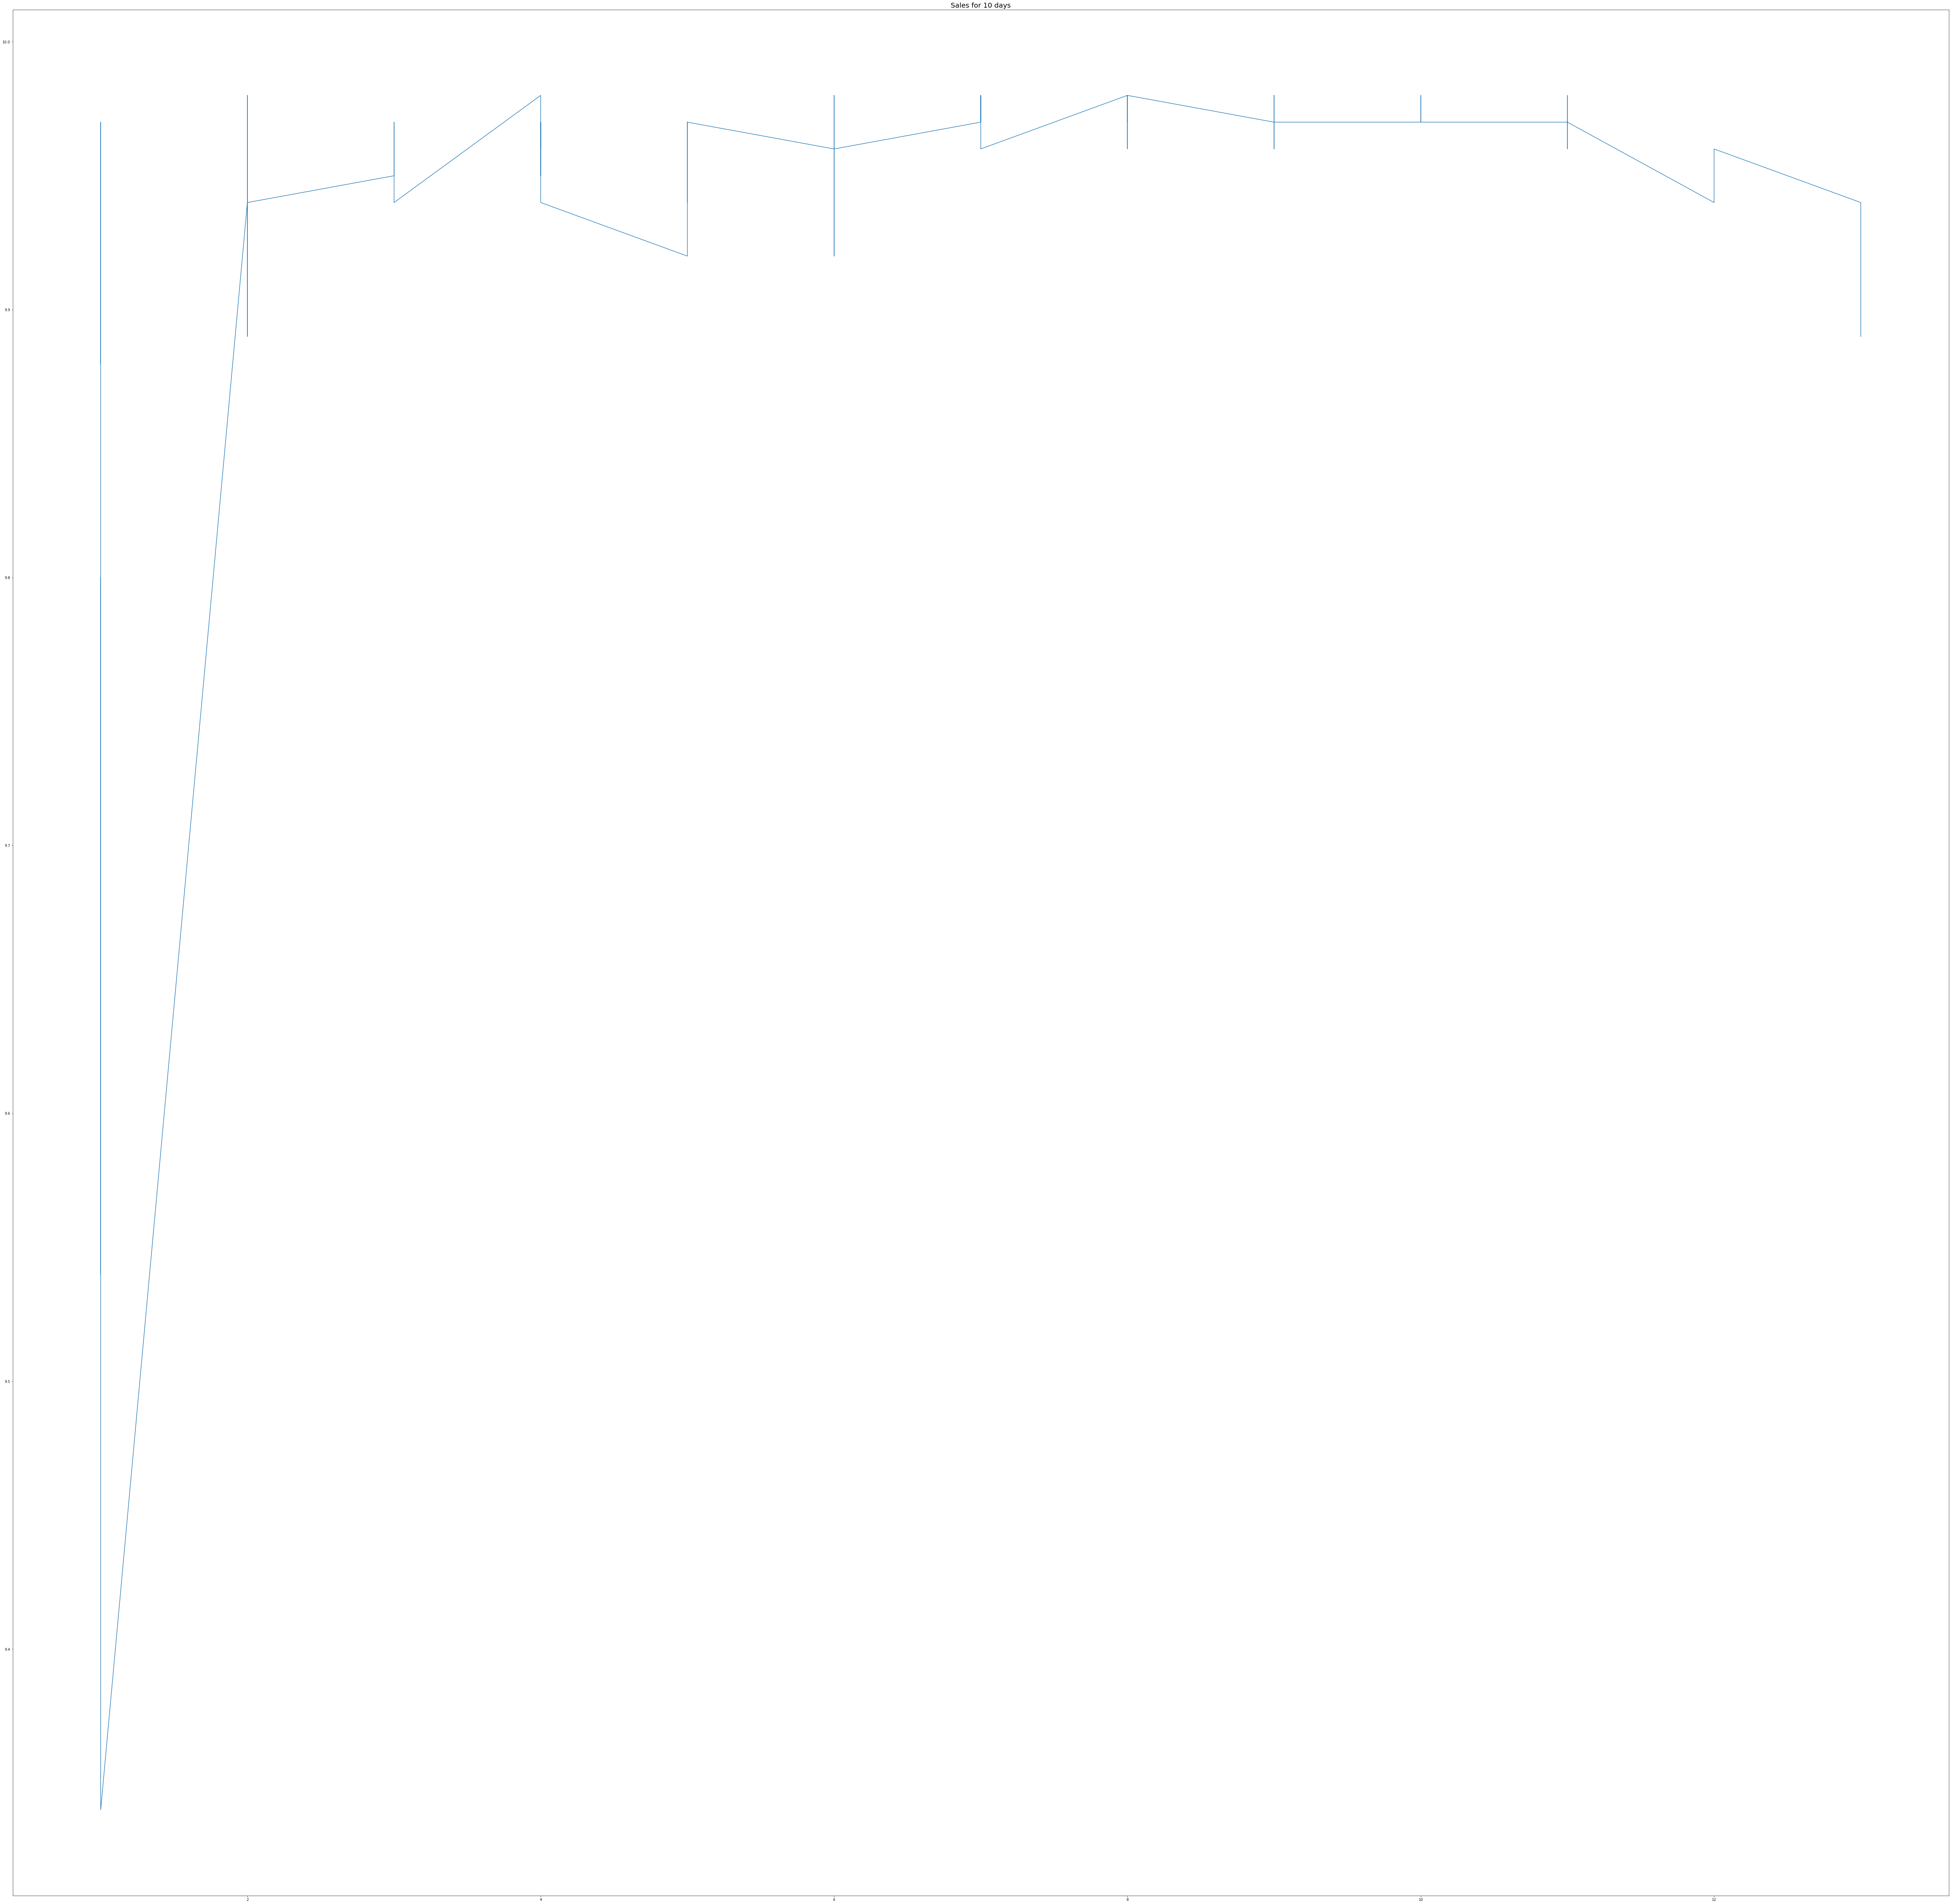

In [30]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(100,100)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.plot(score_data_time['page'],score_data_time['point']) ## 선그래프 생성

plt.title('Sales for 10 days',fontsize=20) ## 타이틀 설정
plt.show()


In [26]:
import requests
from bs4 import BeautifulSoup
import re
import csv

comic_title=[]
comic_point=[]
comic_pointNum=[]

filename ="전지적_독자_시점_평점(참여자 수 포함).csv"
f = open(filename,"w",encoding='utf-8')
writer = csv.writer(f)
columns_name = ["page","title","point","pointNum"]
writer.writerow(columns_name)


for n in range(1, 124):
    req = requests.get('https://comic.naver.com/webtoon/detail?titleId=747269&no='+str(n))
    html = req.text
    soup = BeautifulSoup(html, 'html.parser')
    
    ##sectionContWide > div.tit_area > div.view > h3
    #sectionContWide > div.tit_area > div.view > h3
    titles = soup.select_one('#sectionContWide > div.tit_area > div.view > h3')  # class="movie 
    
    points = soup.select_one('#topPointTotalNumber > strong')

    pointNums = soup.select('#topTotalStarPoint > span.pointTotalPerson > em')
    
    #reviewers = soup.select('#cbox_module > div > div.u_cbox_head > span')
    #cbox_module > div > div.u_cbox_head > span

    for title, point, pointNum in zip(titles, points, pointNums):
         # page, index
        data = [str(n), title.text, point.text, pointNum.text]
        writer.writerow(data)
f.close()


In [27]:
import pandas as pd

df = pd.read_csv('C:/Users/Administrator/Jupyter/전지적_독자_시점_평점(참여자 수 포함).csv')
df

,page,title,point,pointNum
0,1,000. 프롤로그,9.89,63760
1,2,001. Prologue 멸망한 세계에서 살아남는 세 가지 방법,9.92,59589
2,3,002. Ep.01 유료 서비스 시작 (1),9.94,46523
3,4,003. Ep.01 유료 서비스 시작 (2),9.94,42981
4,5,004. Ep.01 유료 서비스 시작 (3),9.94,42056
...,...,...,...,...
118,119,118. Ep. 23 버려진 세계 (2),9.95,22180
119,120,119. Ep. 23 버려진 세계 (3),9.35,27508
120,121,120. Ep. 23 버려진 세계 (4),9.54,24950
121,122,121. Ep. 23 버려진 세계 (5),9.90,22215


In [33]:
df_highpoint = df.sort_values(by=['point','pointNum'], ascending=False)
df_highpoint.head(25)

,page,title,point,pointNum
23,24,023. Ep.06 심판의 시간 (2),9.98,42552
66,67,066. Ep.15 왕이 없는 세계 (2),9.98,41506
21,22,021. Ep.05 어둠 파수꾼 (3),9.98,41330
28,29,028. Ep.07 건물주 (2),9.98,40675
31,32,031. Ep.07 건물주 (5),9.98,38635
36,37,036. Ep.08 긴급 방어전 (4),9.98,38233
34,35,034. Ep.08 긴급 방어전 (2),9.98,38180
22,23,022. Ep.06 심판의 시간 (1),9.98,37922
35,36,035. Ep.08 긴급 방어전 (3),9.98,37889
30,31,030. Ep.07 건물주 (4),9.98,37507
